# Predicting Loan Defaults for LendingClub - Research Question 1

**Research Question 1:** How does the behavior of the defaulted loans differ from the loans that have been repaid?

**Aim**: The aim of this notebook is to analyse the characteristics that differentiate the loans that have defaulted and the loans that have been fully paid.

## Table of contents

1. 'Default' and 'Not Default' Loans.
2. Behaviour of defaulted loans with respect to loan characteristics
3. Behaviour of defaulted loans with respect to borrower characteristics
4. Behaviour of defaulted loans with respect to Borrower indebtedness
5. Behaviour of defaulted loans with respect to credit history
6. Conclusion

## Package requirements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## 'Default' and 'Not Default' Loans.

**Aim**: The aim of this section is identify the number of loans that belong to the 'Default' category and the number of loans that belong to the 'Not Default' category.

In [2]:
#Reading in the dataframe

df = pd.read_csv('loan_analysis.csv')

In [3]:
#Counting the number of loans that belong to each category

df['default'].value_counts()

0    209711
1     47228
Name: default, dtype: int64

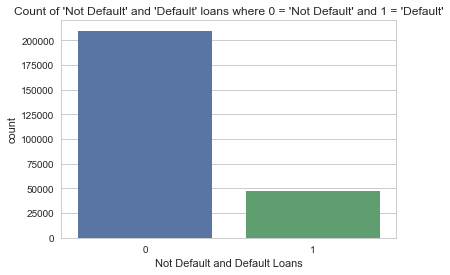

In [4]:
# Creating a bar plot of the two categories of loans

sns.set(style="whitegrid")
sns.countplot(x="default", data=df)
plt.title("Count of 'Not Default' and 'Default' loans where 0 = 'Not Default' and 1 = 'Default'")
plt.xlabel('Not Default and Default Loans')
plt.show()
warnings.filterwarnings('ignore')

From the outputs obtained the following conclusions can be made:

- **18%** of the loans in the dataset are classified as 'Default'.
- **78%** of the loans in the dataset are cassified as 'Not Default.'

## Behaviour of defaulted loans with respect to the loan characteristics.

**Aim**: The aim of this section is to understand the key differences between the loans that have defaulted and the loans that have not with respect to the loan characteristics. 

The key loan characteristics are as follows:

- Loan Grade
- Loan Subgrade
- Interest Rate of the loan
- Loan Purpose 
- Loan Amount

Since the key focus of the next research question is with respect to the loan grade and loan subgrade these characteristics will be analyzed in detail in research question 2.

### Defaulted loans and interest rates

The first step is to identify the distribution of the interest rates.

**Distribution of interest rates**

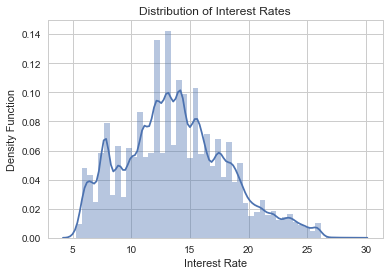

In [5]:
#Visualizaing the distributon of the interest rates with a histogram

sns.distplot(df['int_rate'], kde=True)
plt.title('Distribution of Interest Rates')
plt.xlabel('Interest Rate')
plt.ylabel('Density Function')
plt.show()

From the plot displayed above:
    
- The interest rates are **normally distributed** with a majority of the interest rates between **10 to 20 percent.**

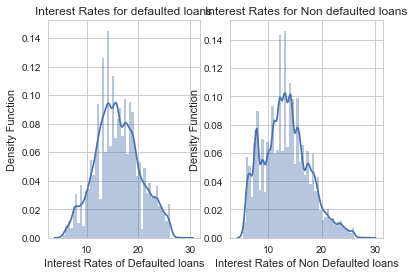

In [6]:
#Creating a dataframe with the defaulted loans only

df_default = df[df['default'] == 1]

#Creating a dataframe with the Not Defaulted loans only

df_nodefault = df[df['default'] == 0] 

#Creating the distribution of interest rates for defaulted loans

plt.subplot(1,2,1)
sns.distplot(df_default['int_rate'], kde=True)
plt.title('Interest Rates for defaulted loans')
plt.xlabel('Interest Rates of Defaulted loans')
plt.ylabel('Density Function')

#Creating the distribution of interest rates for non-defaulted loans

plt.subplot(1,2,2)
sns.distplot(df_nodefault['int_rate'], kde=True)
plt.title('Interest Rates for Non defaulted loans')
plt.xlabel('Interest Rates of Non Defaulted loans')
plt.ylabel('Density Function')

plt.show()

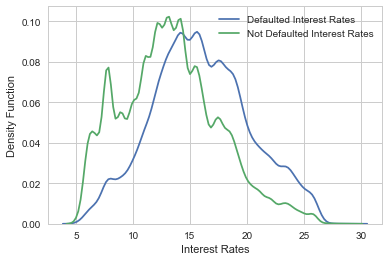

In [7]:
#Density plots of interest rates

sns.kdeplot(df_default['int_rate'], label="Defaulted Interest Rates")
sns.kdeplot(df_nodefault['int_rate'], label="Not Defaulted Interest Rates")
plt.xlabel('Interest Rates')
plt.ylabel('Density Function')
plt.legend()
plt.show()

From the plots displayed above:

- It can be observed that the percentage of loans that have entered into 'Default' are higher when the **interest rate of the loans is greater than 15%.**.
- It can also be observed the percentage of loans that enter into 'Default' are lower when the **interest rate of the loans is lesser than 10%.**

**Percentage of loans having an interest rate greater than 15**

In [8]:
default_15 = (len(df_default[df_default['int_rate'] >= 15])/len(df_default)) * 100
nodefault_15 = (len(df_nodefault[df_nodefault['int_rate'] >= 15])/len(df_nodefault)) * 100

In [9]:
print("The percentage of loans that have an interest rate greater than 15 in the defaulted loans is" + ' ' + str(default_15))

The percentage of loans that have an interest rate greater than 15 in the defaulted loans is 56.794698060472605


In [10]:
print("The percentage of loans that have an interest rate greater than 15 in the Not Defaulted loans is" + ' ' + str(nodefault_15))

The percentage of loans that have an interest rate greater than 15 in the Not Defaulted loans is 31.849545326663836


From the outputs above:
    
- It is clear that a higher percentage of loans have entered into 'Default' if the interest rates are greater than 15%.

**Percentage of loans having an interest rate lesser than 10**

In [11]:
default_10 = (len(df_default[df_default['int_rate'] <= 10])/len(df_default)) * 100
nodefault_10 = (len(df_nodefault[df_nodefault['int_rate'] <= 10])/len(df_nodefault)) * 100

In [12]:
print("The percentage of loans that have an interest rate lesser than 10 in the defaulted loans is" + ' ' + str(default_10))

The percentage of loans that have an interest rate lesser than 10 in the defaulted loans is 7.969848395019903


In [13]:
print("The percentage of loans that have an interest rate lesser than 10 in the Not Defaulted loans is" + ' ' + str(nodefault_10))

The percentage of loans that have an interest rate lesser than 10 in the Not Defaulted loans is 24.01304652593331


From the outputs above:
    
- It is clear that a lower percentage of loans have entered into 'Default' if the interest rates are lesser than 10%.

**Conclusions**

- Thus it can be observed that higher interest rates are associated with higher rates of default.
- This is expected as higher rates of loans yield significantly larger returns for the investor but at the cost of a higher risk.
- It can also be observed that loans having interest rates lesser than 10% are associated with lower rates of default.
- This is expected as lower rates of loans yield significantly lesser returns for the investor at a lower risk.
- These thresholds hold immense value in identifying if these risk thresholds match the loan grades provided by LendingClub.

### Defaulted loans and loan purpose.

**Identifying the counts of the different types of loan purposes**

In [14]:
df['purpose'].value_counts()

debt_consolidation    150253
credit_card            50649
home_improvement       15190
other                  14766
major_purchase          6402
small_business          4926
car                     3720
medical                 2927
moving                  2085
wedding                 2011
house                   1703
vacation                1615
educational              422
renewable_energy         270
Name: purpose, dtype: int64

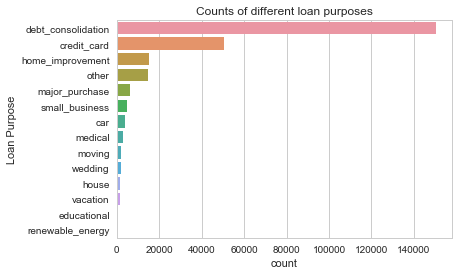

In [15]:
sns.countplot(y="purpose", data=df, order = df['purpose'].value_counts().index)
plt.ylabel('Loan Purpose')
plt.title('Counts of different loan purposes')
plt.show()

From the plot above:
    
- It is clear that a majority of the loans are borrowed for the purpose of debt consolidation, which is followed by credit card repayments and home improvement in third.
- This suggests that a majority of the borrowers use peer to peer lenders in order to pay off already existing debts that the borrowers might have such as loans with banks. 

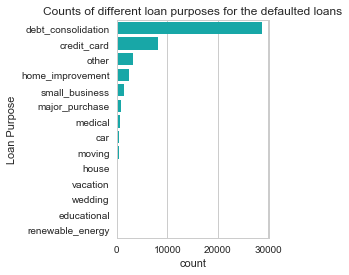

In [16]:
#Counts of the loan purpose for the defaulted loans

plt.subplot(1,2,1)
sns.countplot(y="purpose", data=df_default, order = df_default['purpose'].value_counts().index, color = 'c')
plt.ylabel('Loan Purpose')
plt.title('Counts of different loan purposes for the defaulted loans')
plt.show()

In [17]:
#Calculating the proportion of Loan Purpose within the defaulted loans

proportion_defaulted = ((df_default['purpose'].value_counts())/47228) * 100
proportion_defaulted

debt_consolidation    60.728805
credit_card           17.210130
other                  6.610485
home_improvement       5.054205
small_business         3.095621
major_purchase         1.928940
medical                1.283137
car                    0.997290
moving                 0.954942
house                  0.643686
vacation               0.601338
wedding                0.588634
educational            0.186330
renewable_energy       0.116456
Name: purpose, dtype: float64

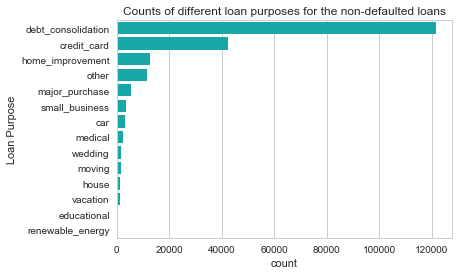

In [18]:
#Counts of the loan purpose for the non-defaulted loans

sns.countplot(y="purpose", data=df_nodefault, order = df_nodefault['purpose'].value_counts().index, color = 'c')
plt.ylabel('Loan Purpose')
plt.title('Counts of different loan purposes for the non-defaulted loans')
plt.show()

In [19]:
#Calculating the proportion of loan purpose within the non- defaulted loans

proportion_notdefaulted = ((df_nodefault['purpose'].value_counts())/209711) * 100
proportion_notdefaulted

debt_consolidation    57.971208
credit_card           20.275999
home_improvement       6.105068
other                  5.552403
major_purchase         2.618365
small_business         1.651797
car                    1.549275
medical                1.106761
wedding                0.826375
moving                 0.779168
house                  0.667109
vacation               0.634683
educational            0.159267
renewable_energy       0.102522
Name: purpose, dtype: float64

**Conclusions**

- The purpose of the loan does not seem to be a key attribute in characterising the loans that have defaulted.
- The only difference in the defaulted loans is the case of 'other', 'debt_consolidation' and 'small business' that have a higher proportion of defaults compared to the fully paid loans but this number is not that much higher. 

### Defaulted Loans and Loan Amounts

**Distribution of loan amounts**

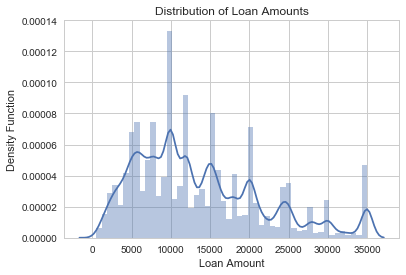

In [20]:
#Visualizaing the distributon of the Annual Incomes with a histogram

sns.distplot(df['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Density Function')
plt.show()

From the plot above:

- A large number of loan amounts are at 10,000.
- The distribution is not very normal in nature and is skewed to the right.
- There seems to be an fairly large number of loans at the extreme right of the distribution for a loan amount of 35,000.

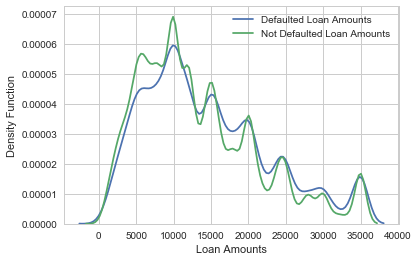

In [21]:
#Density plots of loan amounts

sns.kdeplot(df_default['loan_amnt'], label="Defaulted Loan Amounts")
sns.kdeplot(df_nodefault['loan_amnt'], label="Not Defaulted Loan Amounts")
plt.xlabel('Loan Amounts')
plt.ylabel('Density Function')
plt.legend()
plt.show()

From the distributions displayed above:
    
- The distribution of the loan amounts for the defaulted and the non-defaulted loans are very similar in nature.
- There does however seem to be a **lower density of defaulted loans between a loan amount range of 5000 - 10000.**
- There is also a **higher density of defaulted loans between a loan amount range of 15,000 - 20,000.**
- Another trend that can be observed is that loan amounts between 0 to 15,000 have a lower density of defaults and loan amounts greater than 15,000 have a higher density of defaults.
- This suggests that higher loan amounts have a higher chance of default.

## Behaviour of defaulted loans with respect to the borrower characteristics.

**Aim**: The aim of this section is to understand the key differences between the loans that have defaulted and the loans that have not with respect to the borrower characteristics. 

The key borrower characteristics are as follows:

- Annual Income
- Home Ownership
- Length of employment

### Defaulted loans and Annual Income of borrowers

**Distribution of annual incomes**

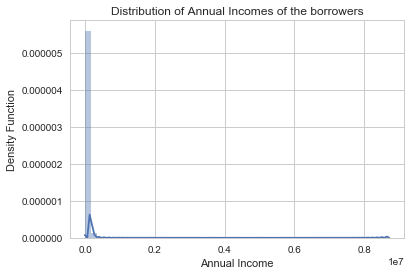

In [22]:
#Visualizaing the distributon of the Annual Incomes with a histogram

sns.distplot(df['annual_inc'], kde=True)
plt.title('Distribution of Annual Incomes of the borrowers')
plt.xlabel('Annual Income')
plt.ylabel('Density Function')
plt.show()

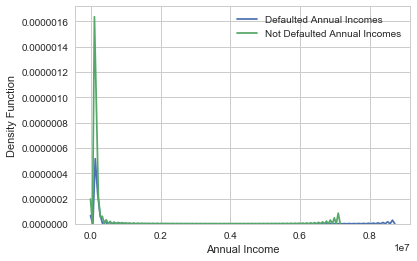

In [23]:
#Density plots of Annual Incomes

sns.kdeplot(df_default['annual_inc'], label="Defaulted Annual Incomes")
sns.kdeplot(df_nodefault['annual_inc'], label="Not Defaulted Annual Incomes")
plt.xlabel('Annual Income')
plt.ylabel('Density Function')
plt.legend()
plt.show()

**Conclusions**

From the distribution above:

- A Borrower with an annual income greater 8,000,000 defaulted.
- The distributions of annual income for the defaulted and non-defaulted loans are similar in nature.
- However, there is a higher density of non defaulted loans for borrowers having an annual incomes in the range between 0 to 80,000. 

### Defaulted loans and Home Ownership

In [24]:
df['home_ownership'].value_counts()

MORTGAGE    126598
RENT        107831
OWN          22282
OTHER          179
NONE            48
ANY              1
Name: home_ownership, dtype: int64

In [25]:
#Converting the attribute to categorical

df['home_ownership'] = df['home_ownership'].astype('category')

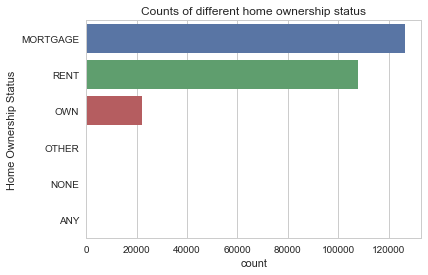

In [26]:
#Counts of the Home Owenerships 

sns.countplot(y="home_ownership", data=df, order = df['home_ownership'].value_counts().index)
plt.ylabel('Home Ownership Status')
plt.title('Counts of different home ownership status')
plt.show()

From the plot above:
    
- Mortgage, Rent and Own are the 3 most popular categories of homer ownership status amoung the borrowers. 

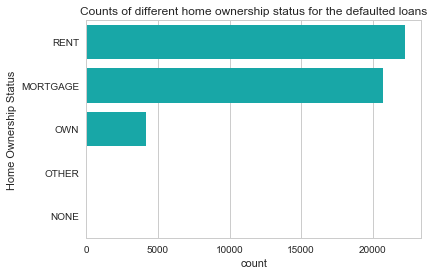

In [27]:
#Counts of the home ownerships status for the defaulted loans

sns.countplot(y="home_ownership", data=df_default, order = df_default['home_ownership'].value_counts().index, color = 'c')
plt.ylabel('Home Ownership Status')
plt.title('Counts of different home ownership status for the defaulted loans')
plt.show()

In [28]:
#Calculating the proportion of home ownership status within the defaulted loans

proportion_defaulted = ((df_default['home_ownership'].value_counts())/47228) * 100
proportion_defaulted

RENT        47.162700
MORTGAGE    43.880749
OWN          8.859151
OTHER        0.080461
NONE         0.016939
Name: home_ownership, dtype: float64

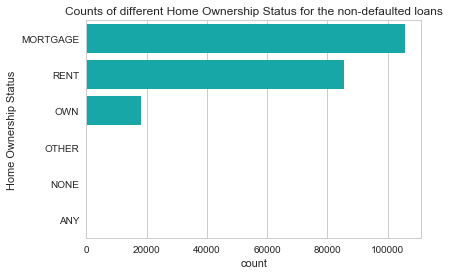

In [29]:
#Counts of the home ownership status for the non-defaulted loans

sns.countplot(y="home_ownership", data=df_nodefault, order = df_nodefault['home_ownership'].value_counts().index, color = 'c')
plt.ylabel('Home Ownership Status')
plt.title('Counts of different Home Ownership Status for the non-defaulted loans')
plt.show()

In [30]:
#Calculating the proportion of home ownership status within the non- defaulted loans

proportion_notdefaulted = ((df_nodefault['home_ownership'].value_counts())/209711) * 100
proportion_notdefaulted

MORTGAGE    50.485668
RENT        40.797574
OWN          8.629972
OTHER        0.067235
NONE         0.019074
ANY          0.000477
Name: home_ownership, dtype: float64

**Conclusions**

From the outputs produced above it is clear that:

- Borrowers who have a home ownership status of 'RENT' have a higher chance of defaulting on their loans opposed to the owners who had the home ownership status of 'MORTGAGE'.

### Defaulted loans and length of employment

In [31]:
df['emp_length'].value_counts()

10+ years    77726
2 years      23996
< 1 year     21447
3 years      20750
5 years      18308
1 year       17299
4 years      16468
6 years      14960
7 years      14256
8 years      12029
9 years       9698
Name: emp_length, dtype: int64

In [32]:
#Converting the attribute to categorical

df['emp_length'] = df['emp_length'].astype('category')

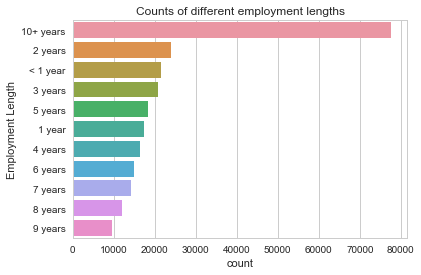

In [33]:
#Counts of the Employment Lengths 

sns.countplot(y="emp_length", data=df, order = df['emp_length'].value_counts().index)
plt.ylabel('Employment Length')
plt.title('Counts of different employment lengths')
plt.show()

From the plot produced above it is clear that:

- The majority of the borrowers of peer to peer lending loans are borrowers having an employment length of greater than 10 years.
- The next majority of borrowers are 2, lesser than 1 year and 3 years of employment respectively. 

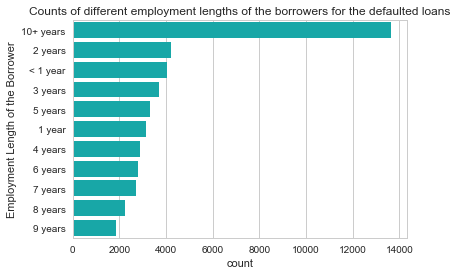

In [34]:
#Counts of the employment length for the defaulted loans

sns.countplot(y="emp_length", data=df_default, order = df_default['emp_length'].value_counts().index, color = 'c')
plt.ylabel('Employment Length of the Borrower')
plt.title('Counts of different employment lengths of the borrowers for the defaulted loans')
plt.show()

In [35]:
#Calculating the proportion of employment length within the defaulted loans

proportion_defaulted = ((df_default['emp_length'].value_counts())/47228) * 100
proportion_defaulted

10+ years    28.931989
2 years       8.897264
< 1 year      8.579656
3 years       7.855509
5 years       7.050902
1 year        6.669772
4 years       6.134073
6 years       5.930804
7 years       5.727535
8 years       4.783179
9 years       3.910816
Name: emp_length, dtype: float64

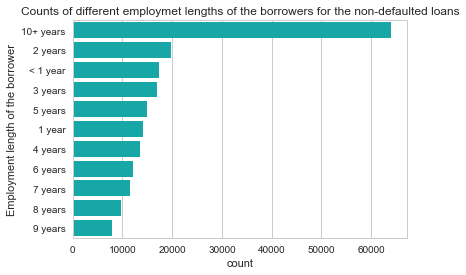

In [36]:
#Counts of the employment length for the non-defaulted loans

sns.countplot(y="emp_length", data=df_nodefault, order = df_nodefault['emp_length'].value_counts().index, color = 'c')
plt.ylabel('Employment length of the borrower')
plt.title('Counts of different employmet lengths of the borrowers for the non-defaulted loans')
plt.show()

In [37]:
#Calculating the proportion of employment lengths within the non - defaulted loans

proportion_notdefaulted = ((df_nodefault['emp_length'].value_counts())/209711) * 100
proportion_notdefaulted

10+ years    30.547754
2 years       9.438704
< 1 year      8.294748
3 years       8.125468
5 years       7.142210
1 year        6.746904
4 years       6.471287
6 years       5.797979
7 years       5.508056
8 years       4.658792
9 years       3.743724
Name: emp_length, dtype: float64

**Conclusions**

From the outputs produced above:

- There is no clear distinction between the employment lengths of the borrowers and the chance of a loan being default. 

## Behaviour of defaulted loans with respect to the borrower indebtedness.

**Aim**: The aim of this section is to understand the key differences between the loans that have defaulted and the loans that have not with respect to the borrower idebtedness. 

The key borrower idebtedness characteristics are as follows:

- **Debt to Income Ratio (DTI)**: The Debt to Income ratio is the ratio of the total monthly debt payments made by the borrower excluding mortgage and the Lending Club loan itself to the total monthly income of the borrower.

*DTI = ((Total Monthly Debt Payments - Lending Club & Mortgage Monthly Payments) / Total Monthly Income)*

**Distribution of DTI**

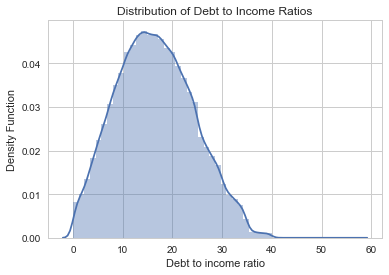

In [38]:
#Visualizaing the distributon of the DTI with a histogram

sns.distplot(df['dti'], kde=True)
plt.title('Distribution of Debt to Income Ratios')
plt.xlabel('Debt to income ratio')
plt.ylabel('Density Function')
plt.show()

From the plot above:

- The debt to income ratio is distributed normally between 0 to 40.

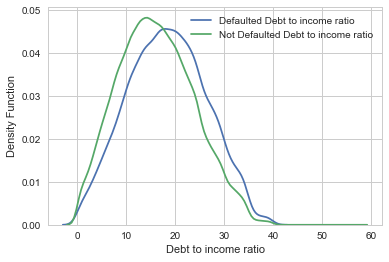

In [39]:
#Density plots of Annual Incomes

sns.kdeplot(df_default['dti'], label="Defaulted Debt to income ratio")
sns.kdeplot(df_nodefault['dti'], label="Not Defaulted Debt to income ratio")
plt.xlabel('Debt to income ratio')
plt.ylabel('Density Function')
plt.legend()
plt.show()

**Conclusions**

From the plot above:
    
- It is clear that there is a higher chance of default when the borrower has a debt to income ratio **greater than 15.**

In [40]:
#Calculating the percentage of loans that have DTI greater than 15 in the defaulted and non defaulted loans

default_dti = (len(df_default[df_default['dti'] >= 15])/len(df_default)) * 100
nodefault_dti = (len(df_nodefault[df_nodefault['dti'] >= 15])/len(df_nodefault)) * 100

In [41]:
print("The percentage of loans that have an Debt to income ratio greater than 15 in the defaulted loans is" + ' ' + str(default_dti))

The percentage of loans that have an Debt to income ratio greater than 15 in the defaulted loans is 64.92546794274583


In [42]:
print("The percentage of loans that have an Debt to income ratio greater than 15 in the Not Defaulted loans is" + ' ' + str(nodefault_dti))

The percentage of loans that have an Debt to income ratio greater than 15 in the Not Defaulted loans is 53.54225577103728


**Conclusions**

From the outputs displayed above:
    
- It is clear that there is a higher chance of default when the borrower has a debt to income ratio **greater than 15.**

## Behaviour of defaulted loans with respect to the credit history.


**Aim**: The aim of this section is to understand the key differences between the loans that have defaulted and the loans that have not with respect to the credit history of the borrower. 

The key credit history characteristics of the borrower are as follows:

- **Deliquency 2 years**: The number of 30+ past-due payments in the borrowers file.
- **Public Records**: The number of deragatory public records in the borrowers file. 
- **Months since last deliquency:** The number of months since the borrowers last deliquency.
- **Open Accounts**: The number of open credit lines in the borrowers file.
- **Revovling Ultilization rate:** The amount of credit the borrower is using relative to all avaliable revovling credit.
- **Inquiries 6 months**: The number of inquires by creditors over the last 6 months.
- **Credit History Length**: The number of years since the earliest credit line was opened for the borrower from the current year.

### Defaulted loans and deliquency in the past 2 years

In [43]:
df['delinq_2yrs'].value_counts()

0.0     215544
1.0      28612
2.0       7902
3.0       2611
4.0       1058
5.0        552
6.0        270
7.0        145
8.0         88
9.0         52
10.0        31
12.0        24
11.0        22
14.0         8
13.0         5
15.0         4
18.0         4
16.0         2
17.0         2
22.0         1
19.0         1
29.0         1
Name: delinq_2yrs, dtype: int64

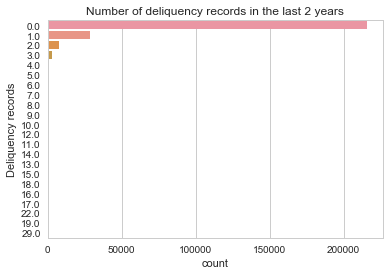

In [44]:
#Counts of the Deliquency records

sns.countplot(y="delinq_2yrs", data=df, order = df['delinq_2yrs'].value_counts().index)
plt.ylabel('Deliquency records')
plt.title('Number of deliquency records in the last 2 years')
plt.show()

From the plot above:

- A majoirty of the borrowers do not have any deliquency records in the last 2 years.
- There are a few borrowers with 1,2, 3 and 4 deliquency records.

In [45]:
#Converting the attribute to categorical

df['delinq_2yrs'] = df['delinq_2yrs'].astype('category')

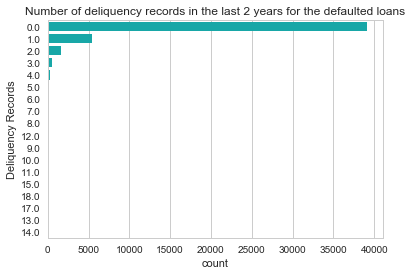

In [46]:
#Counts of the deliquency records for the defaulted loans

sns.countplot(y="delinq_2yrs", data=df_default, order = df_default['delinq_2yrs'].value_counts().index, color = 'c')
plt.ylabel('Deliquency Records')
plt.title('Number of deliquency records in the last 2 years for the defaulted loans')
plt.show()

In [47]:
#Calculating the proportion of deliquency records within the defaulted loans

proportion_defaulted = ((df_default['delinq_2yrs'].value_counts())/47228) * 100
proportion_defaulted

0.0     82.705175
1.0     11.601169
2.0      3.417464
3.0      1.213263
4.0      0.482764
5.0      0.268908
6.0      0.122809
7.0      0.078343
8.0      0.027526
12.0     0.023291
9.0      0.023291
10.0     0.016939
11.0     0.008470
15.0     0.002117
18.0     0.002117
17.0     0.002117
13.0     0.002117
14.0     0.002117
Name: delinq_2yrs, dtype: float64

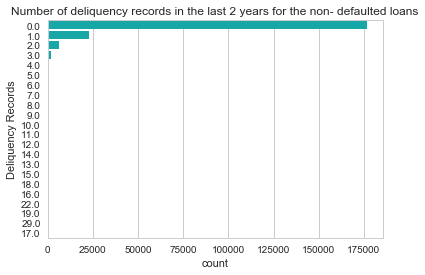

In [48]:
#Counts of the deliquency records for the non - defaulted loans

sns.countplot(y="delinq_2yrs", data=df_nodefault, order = df_nodefault['delinq_2yrs'].value_counts().index, color = 'c')
plt.ylabel('Deliquency Records')
plt.title('Number of deliquency records in the last 2 years for the non- defaulted loans')
plt.show()

In [49]:
#Calculating the proportion of deliquency records within the non- defaulted loans

proportion_notdefaulted = ((df_nodefault['delinq_2yrs'].value_counts())/209711) * 100
proportion_notdefaulted

0.0     84.155814
1.0     11.030895
2.0      2.998412
3.0      0.971814
4.0      0.395783
5.0      0.202660
6.0      0.101092
7.0      0.051499
8.0      0.035764
9.0      0.019551
10.0     0.010967
11.0     0.008583
12.0     0.006199
14.0     0.003338
13.0     0.001907
15.0     0.001431
18.0     0.001431
16.0     0.000954
22.0     0.000477
19.0     0.000477
29.0     0.000477
17.0     0.000477
Name: delinq_2yrs, dtype: float64

**Conclusions**

From the plots above:

- There is no clear distinction between the deliquency records for the defaulted and non-defaulted loans except for the fact that the defaulted loans have a slightly higher proportion of borrowers that have 1 and 2 deliquency records.

### Defaulted loans and deragatory public records

In [50]:
df['pub_rec'].value_counts()

0.0     225540
1.0      27752
2.0       2583
3.0        687
4.0        204
5.0         94
6.0         39
7.0         19
8.0          8
9.0          5
10.0         5
11.0         1
12.0         1
15.0         1
Name: pub_rec, dtype: int64

In [51]:
#Converting the attribute to categorical

df['pub_rec'] = df['pub_rec'].astype('category')

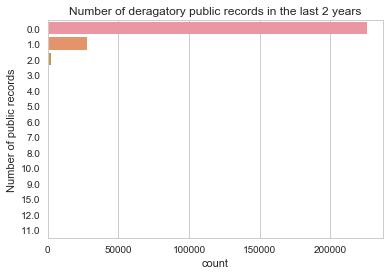

In [52]:
#Counts of the Public Records

sns.countplot(y="pub_rec", data=df, order = df['pub_rec'].value_counts().index)
plt.ylabel('Number of public records')
plt.title('Number of deragatory public records in the last 2 years')
plt.show()

From the plot above:

- Most borrowers have no deragatory public records
- Some borrowers however have 1 and 2 deragatory public records

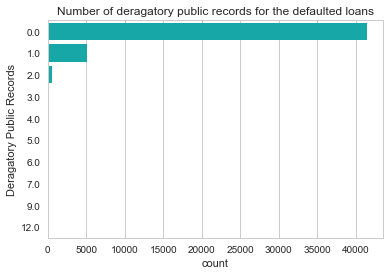

In [53]:
#Counts of the deragatory public records for the defaulted loans

sns.countplot(y="pub_rec", data=df_default, order = df_default['pub_rec'].value_counts().index, color = 'c')
plt.ylabel('Deragatory Public Records')
plt.title('Number of deragatory public records for the defaulted loans')
plt.show()

In [54]:
#Calculating the proportion of deliquency records within the defaulted loans

proportion_defaulted = ((df_default['pub_rec'].value_counts())/47228) * 100
proportion_defaulted

0.0     87.659863
1.0     10.819853
2.0      1.075633
3.0      0.256204
4.0      0.097400
5.0      0.055052
6.0      0.019056
7.0      0.010587
9.0      0.004235
12.0     0.002117
Name: pub_rec, dtype: float64

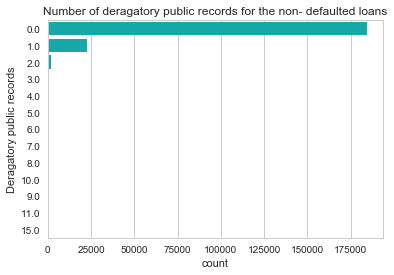

In [55]:
#Counts of the deragatory public records for the non - defaulted loans

sns.countplot(y="pub_rec", data=df_nodefault, order = df_nodefault['pub_rec'].value_counts().index, color = 'c')
plt.ylabel('Deragatory public records')
plt.title('Number of deragatory public records for the non- defaulted loans')
plt.show()

In [56]:
#Calculating the proportion of deragatory public records within the non- defaulted loans

proportion_notdefaulted = ((df_nodefault['pub_rec'].value_counts())/209711) * 100
proportion_notdefaulted

0.0     87.806553
1.0     10.796763
2.0      0.989457
3.0      0.269895
4.0      0.075342
5.0      0.032426
6.0      0.014305
7.0      0.006676
8.0      0.003815
10.0     0.002384
9.0      0.001431
11.0     0.000477
15.0     0.000477
Name: pub_rec, dtype: float64

**Conclusions**

From the outputs produce above:

- There is no clear distinction between the defaulted and non-defaulted loans with respect to the deragatory public records of the borrower

### Defaulted loans and months since last deliquency of the borrower

**Distribution of the months since last deliquency**

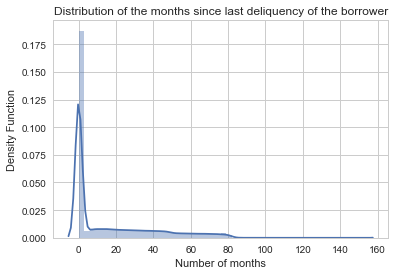

In [57]:
#Visualizaing the distributon of the months since last deliquency with a histogram

sns.distplot(df['mths_since_last_delinq'], kde=True)
plt.title('Distribution of the months since last deliquency of the borrower')
plt.xlabel('Number of months')
plt.ylabel('Density Function')
plt.show()

From the plot above:

- It is clear that most borrowers have 0 months since last deliquency. 
- The months are normally distributed between 0 to 10.
- The distribution has outliers for months that are greater than 10.


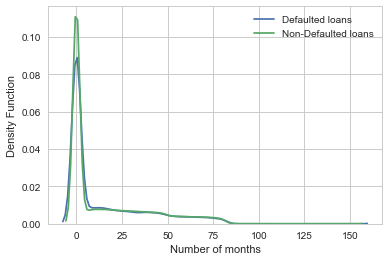

In [58]:
#Density plots of months since last deliquency

sns.kdeplot(df_default['mths_since_last_delinq'], label="Defaulted loans")
sns.kdeplot(df_nodefault['mths_since_last_delinq'], label="Non-Defaulted loans")
plt.xlabel('Number of months')
plt.ylabel('Density Function')
plt.legend()
plt.show()

**Conclusions**

From the outputs produced above:

- The distribution of the defaulted loans and the non-defaulted loans with respect to months since the last deliquency of the borrower is almost identical except for the fact that the Non-Defaulted loans have a higher density of values at 0.


### Defaulted loans and open credit lines

**Distribution of open credit lines/accounts of the borrower**

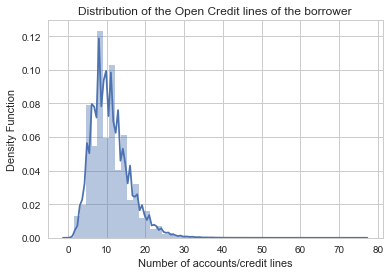

In [59]:
#Visualizaing the distributon of the number of credit lines with a histogram

sns.distplot(df['open_acc'], kde=True)
plt.title('Distribution of the Open Credit lines of the borrower')
plt.xlabel('Number of accounts/credit lines')
plt.ylabel('Density Function')
plt.show()

From the plot above:

- The number of credit lines is normally distributed between 0 to 30. 

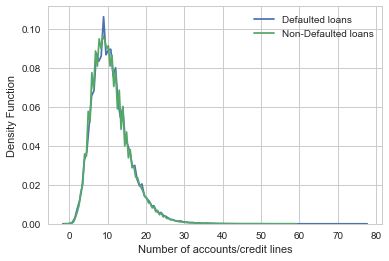

In [60]:
#Density plots of open credit lines

sns.kdeplot(df_default['open_acc'], label="Defaulted loans")
sns.kdeplot(df_nodefault['open_acc'], label="Non-Defaulted loans")
plt.xlabel('Number of accounts/credit lines')
plt.ylabel('Density Function')
plt.legend()
plt.show()

**Conclusions**

From the output above:

- The distribution of the defaulted loans and the non-defaulted loans with respect to the number of credit lines of borrower is nearly identical in nature indicating that the behavior does not change when it comes to the defaulted loans.

### Defaulted loans and Revovlving Ultilization Rates

**Distribution of relovlving ultilization rates**

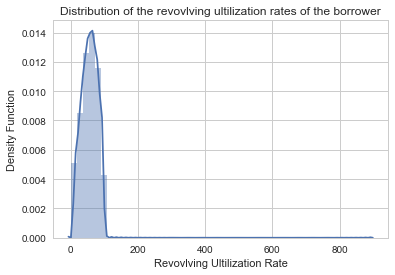

In [61]:
#Visualizaing the distributon of the revovlving ultilization rates with a histogram

sns.distplot(df['revol_util'], kde=True)
plt.title('Distribution of the revovlving ultilization rates of the borrower')
plt.xlabel('Revovlving Ultilization Rate')
plt.ylabel('Density Function')
plt.show()

From the plot above:
    
- The rates are normally distributed between 0 to 100% with a few outliers which could be potential errors as the rates are between 0 to 100 only.

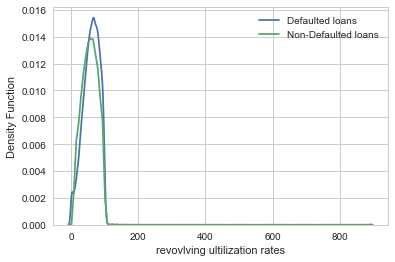

In [62]:
#Density plots of the revovlving ultilization rates

sns.kdeplot(df_default['revol_util'], label="Defaulted loans")
sns.kdeplot(df_nodefault['revol_util'], label="Non-Defaulted loans")
plt.xlabel('revovlving ultilization rates')
plt.ylabel('Density Function')
plt.legend()
plt.show()

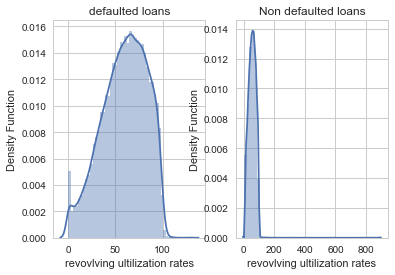

In [63]:
#Creating the distribution of revovlving ultilization rates for defaulted loans

plt.subplot(1,2,1)
sns.distplot(df_default['revol_util'], kde=True)
plt.title('defaulted loans')
plt.xlabel('revovlving ultilization rates')
plt.ylabel('Density Function')

#Creating the distribution of revovlving ultilization rates for non-defaulted loans

plt.subplot(1,2,2)
sns.distplot(df_nodefault['revol_util'], kde=True)
plt.title('Non defaulted loans')
plt.xlabel('revovlving ultilization rates')
plt.ylabel('Density Function')

plt.show()

**Conclusions**

From the outputs produced above:

- The outlier rate of greater than 100 belongs to the non-defaulted loans and is most likely an error as rates are between 0 to 100 percent only.
- The rates are skewed slightly towards the left for the defaulted loans.
- A higher density of rates between 50 to 100 percent are present for the defaulted loans than the non-defaulted loans indicating high revovlving ultilization rates have a small influence on the loan defaults.

### Defaulted loans and inquiries over the last 6 months

**Distribution of inquires over the last 6 months**

In [64]:
#Converting the attribute to categorical

df['inq_last_6mths'] = df['inq_last_6mths'].astype('category')

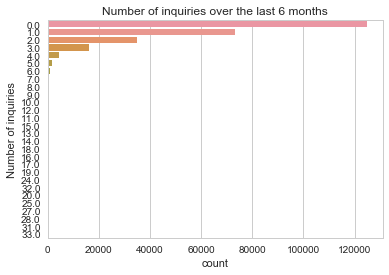

In [65]:
#Counts of the Public Records

sns.countplot(y="inq_last_6mths", data=df, order = df['inq_last_6mths'].value_counts().index)
plt.ylabel('Number of inquiries')
plt.title('Number of inquiries over the last 6 months')
plt.show()

From the plot above:

- Most inquiries are between 0 to 2 for most of the borrowers while a few of them are between 3 to 6.

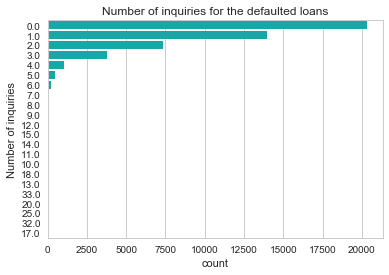

In [66]:
#Counts of the inquiries for the defaulted loans

sns.countplot(y="inq_last_6mths", data=df_default, order = df_default['inq_last_6mths'].value_counts().index, color = 'c')
plt.ylabel('Number of inquiries')
plt.title('Number of inquiries for the defaulted loans')
plt.show()

In [67]:
#Calculating the proportion of inquiries within the defaulted loans

proportion_defaulted = ((df_default['inq_last_6mths'].value_counts())/47228) * 100
proportion_defaulted

0.0     42.987211
1.0     29.567206
2.0     15.537393
3.0      7.988905
4.0      2.144914
5.0      0.935885
6.0      0.493351
7.0      0.143982
8.0      0.097400
9.0      0.038113
12.0     0.012704
15.0     0.010587
14.0     0.010587
11.0     0.006352
10.0     0.006352
18.0     0.004235
13.0     0.004235
33.0     0.002117
20.0     0.002117
25.0     0.002117
32.0     0.002117
17.0     0.002117
Name: inq_last_6mths, dtype: float64

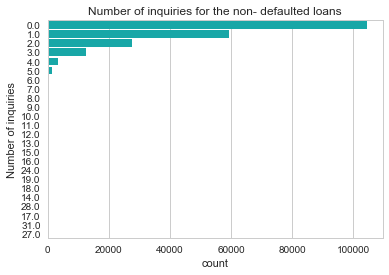

In [68]:
#Counts of the inquiries for the non - defaulted loans

sns.countplot(y="inq_last_6mths", data=df_nodefault, order = df_nodefault['inq_last_6mths'].value_counts().index, color = 'c')
plt.ylabel('Number of inquiries')
plt.title('Number of inquiries for the non- defaulted loans')
plt.show()

In [69]:
#Calculating the proportion of inquiries within the non- defaulted loans

proportion_notdefaulted = ((df_nodefault['inq_last_6mths'].value_counts())/209711) * 100
proportion_notdefaulted

0.0     49.786134
1.0     28.323741
2.0     13.225820
3.0      5.956292
4.0      1.635584
5.0      0.663294
6.0      0.269418
7.0      0.059606
8.0      0.034333
9.0      0.015259
10.0     0.010014
11.0     0.005722
12.0     0.004292
13.0     0.001907
15.0     0.001907
16.0     0.001431
24.0     0.000954
19.0     0.000954
18.0     0.000954
14.0     0.000477
28.0     0.000477
17.0     0.000477
31.0     0.000477
27.0     0.000477
Name: inq_last_6mths, dtype: float64

**Conclusions**

From the outputs produced above

- The proportion of 0 inquiries for the non-defaulted loans is higher by 7% compared to the defaulted loans.
- The proportion of 1, 2, 3, 4 and greater than 4 inquiries for the defaulted loans is higher compared to the non-defaulted loans.

### Defaulted loans and credit history length

In [70]:
#Cleaning the column to include only the years

df['earliest_cr_line'] = df['earliest_cr_line'].str[4:]

In [71]:
#Removing unwanted text

df = df[df.earliest_cr_line.str.contains("ction") == False]

In [72]:
#Converting the column elements into integers

df['earliest_cr_line'] = df['earliest_cr_line'].astype('int64')

In [73]:
#Subracting the current year 2018 from each element 

df['earliest_cr_line'] = (2018 - df['earliest_cr_line'])

**Distribution of credit history length**

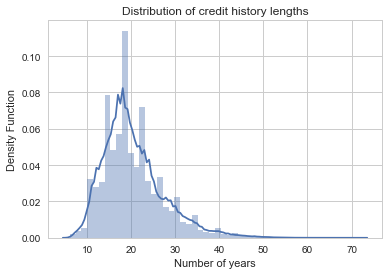

In [74]:
#Visualizaing the distributon of the credit history length with a histogram

sns.distplot(df['earliest_cr_line'], kde=True)
plt.title('Distribution of credit history lengths')
plt.xlabel('Number of years')
plt.ylabel('Density Function')
plt.show()

From the plot above:
    
- The credit history length is normally distributed between 0 to 50 years.

In [75]:
#Transforming the default and not-default datasets

#Cleaning the column to include only the years

df_default['earliest_cr_line'] = df_default['earliest_cr_line'].str[4:]
df_nodefault['earliest_cr_line'] = df_nodefault['earliest_cr_line'].str[4:]

In [76]:
#Removing unwanted text

df_default = df_default[df_default.earliest_cr_line.str.contains("ction") == False]
df_nodefault = df_nodefault[df_nodefault.earliest_cr_line.str.contains("ction") == False]

In [77]:
#Converting the column elements into integers

df_default['earliest_cr_line'] = df_default['earliest_cr_line'].astype('int64')
df_nodefault['earliest_cr_line'] = df_nodefault['earliest_cr_line'].astype('int64')

In [78]:
#Subracting the current year 2018 from each element 

df_default['earliest_cr_line'] = (2018 - df_default['earliest_cr_line'])
df_nodefault['earliest_cr_line'] = (2018 - df_nodefault['earliest_cr_line'])

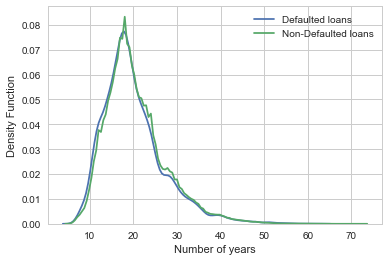

In [79]:
#Density plots of the credit history lengths of the defaulted and non-defaulted loans

sns.kdeplot(df_default['earliest_cr_line'], label="Defaulted loans")
sns.kdeplot(df_nodefault['earliest_cr_line'], label="Non-Defaulted loans")
plt.xlabel('Number of years')
plt.ylabel('Density Function')
plt.legend()
plt.show()

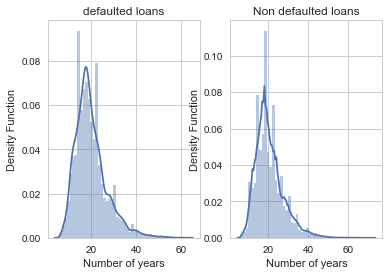

In [80]:
#Creating the distribution of credit history length for defaulted loans

plt.subplot(1,2,1)
sns.distplot(df_default['earliest_cr_line'], kde=True)
plt.title('defaulted loans')
plt.xlabel('Number of years')
plt.ylabel('Density Function')

#Creating the distribution of credit history length for non-defaulted loans

plt.subplot(1,2,2)
sns.distplot(df_nodefault['earliest_cr_line'], kde=True)
plt.title('Non defaulted loans')
plt.xlabel('Number of years')
plt.ylabel('Density Function')

plt.show()

**Conclusions**

From the outputs produced above

- There is a higher density of defaulted loans for borrowers who have just recently opened their credit lines.
- The density of non-defaulted loans is higher when borrowers have 20 years of credit history.
- The density of defaulted loans is higher for borrowers with 0 to 10 years of credit history.

## Conclusion

From the analysis executed above the following conclusions/inferences can be drawn about how the behaviour of defaulted loans differ from that of the non-defaulted loans:

### Loan Characteristics


**Interest Rate**

- The percentage of loans that enter into default is higher when the interest rates are greater than 15%.
- The percentage of loans that enter into default is lower when the interest rates are lesser than 10%.

**Loan Purpose**

- Loans borrowed for the purpose of 'small business', 'debt consolidation' and 'other' have a slightly higher chance of default than loans taken out for the other categories of purposes. 

**Loan Amount**

- There does however seem to be a lower density of defaulted loans between a loan amount range of 5000 - 10000.
- There is also a higher density of defaulted loans between a loan amount range of 15,000 - 20,000.

### Borrower Characteristics

**Annual Income**

- There is no trend/pattern that can differentiate between the behaviour of defaulted and non-defaulted loans.
- However, there is a higher density of non defaulted loans for borrowers having an annual incomes in the range between 0 to 80,000. 

**Home Ownership**

- Borrowers who have a home ownership status of 'RENT' have a higher chance of defaulting on their loans opposed to the owners who had the home ownership status of 'MORTGAGE'.

**Employment Length**

- There is no clear distinction between the employment lengths of the borrowers and the chance of a loan being default.

### Borrower Indebtedness

**Debt To Income Ratio (DTI)**

- There is a higher chance of default when the borrower has a debt to income ratio greater than 15.

### Credit History

**Deliquency 2 years**

- Defaulted loans have a slightly higher proportion of borrowers that have 1 and 2 deliquency records.

**Deragatory public records**

- There is no clear distinction between the defaulted and non-defaulted loans with respect to the deragatory public records of the borrower.

**Months since last deliquency**

- The distribution of the defaulted loans and the non-defaulted loans with respect to months since the last deliquency of the borrower is almost identical except for the fact that the Non-Defaulted loans have a higher density of values at 0 months.

**Revovlving utilization rates**

- The rates are skewed slightly towards the left for the defaulted loans.
- A higher density of rates between 50 to 100 percent are present for the defaulted loans than the non-defaulted loans indicating high revovlving ultilization rates have a small influence on the loan defaults.

**Inquiries in the last 6 months**

- The proportion of 0 inquiries for the non-defaulted loans is higher by 7% compared to the defaulted loans.
- The proportion of 1, 2, 3, 4 and greater than 4 inquiries for the defaulted loans is higher compared to the non-defaulted loans.

**Credit history length**

- There is a higher density of defaulted loans for borrowers who have just recently opened their credit lines.
- The density of non-defaulted loans is higher when borrowers have 20 years of credit history.
- The density of defaulted loans is higher for borrowers with 0 to 10 years of credit history.